# League of Legends Early Game Analysis & Prediction with ML Classifiers
####     League of Legends is an famous online game where 10 players are divided into 2 teams(Blue and Red), each consisting of 5 players. Generally, 5 players assume different roles, one of which is "Jungler"(JG). Game objective is to destroy the opponent"s Nexus to claim victory. Throughout the game, players need to gain an advantage by killing enemy players and contesting to access various resources.  
##### This dataset contains the first 10 min of the game and players have roughly the same level in high ELO games(DIAMOND I to MASTER).
##### Dataset:https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/data

##### ※The analyzed content is simply based on my preferences! :P

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Importing Data and Preprocessing
### Importing and Overviewing Data

In [44]:
data= pd.read_csv("LOLstats.csv")
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [46]:
data.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [47]:
print("Duplicates : ", len(data[data.duplicated()]))

Duplicates :  0


#### There is no N/A or duplicated value.

### Removing Unnecessary Data and Renaming Columns

In [48]:
data.drop(["gameId"], axis=1, inplace= True)
data.drop(["blueTotalGold","blueTotalExperience","blueEliteMonsters","blueTotalMinionsKilled","redTotalGold","redTotalExperience","redEliteMonsters","redTotalMinionsKilled"], axis=1, inplace= True)
for col in data.columns:
    data.rename(columns={col: col.replace("blue", "B").replace("red", "R").replace("Experience", "Exp")}, inplace= True)
data.columns

Index(['BWins', 'BWardsPlaced', 'BWardsDestroyed', 'BFirstBlood', 'BKills',
       'BDeaths', 'BAssists', 'BDragons', 'BHeralds', 'BTowersDestroyed',
       'BAvgLevel', 'BTotalJungleMinionsKilled', 'BGoldDiff', 'BExpDiff',
       'BCSPerMin', 'BGoldPerMin', 'RWardsPlaced', 'RWardsDestroyed',
       'RFirstBlood', 'RKills', 'RDeaths', 'RAssists', 'RDragons', 'RHeralds',
       'RTowersDestroyed', 'RAvgLevel', 'RTotalJungleMinionsKilled',
       'RGoldDiff', 'RExpDiff', 'RCSPerMin', 'RGoldPerMin'],
      dtype='object')

### Data Distribution

In [49]:
data.describe()

,BWins,BWardsPlaced,BWardsDestroyed,BFirstBlood,BKills,BDeaths,BAssists,BDragons,BHeralds,BTowersDestroyed,...,RAssists,RDragons,RHeralds,RTowersDestroyed,RAvgLevel,RTotalJungleMinionsKilled,RGoldDiff,RExpDiff,RCSPerMin,RGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,...,6.662112,0.413098,0.160036,0.043021,6.925316,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,...,4.060612,0.492415,0.366658,0.216900,0.305311,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.800000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,6.800000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,7.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,...,9.000000,1.000000,0.000000,0.000000,7.200000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,...,28.000000,1.000000,1.000000,2.000000,8.200000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### Removing Outliers
#### From the describe() function, we can observe that the total num of wards placed on both sides appears to be significantly higher than expected. 

#### We assume that all players purchase the initial ward item (each ward has a 2-min CD).If each player places a ward at around 1 min into the game, the maximum num of wards a team can place in 10 mins is approx. 20. Assuming all players are proactive in ward placement, the maximum num of wards placed by a team in 10 mins should not exceed 30."

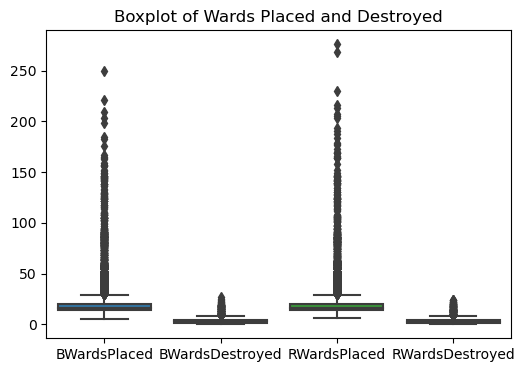

In [50]:
Outliers_Col= ["BWardsPlaced", "BWardsDestroyed", "RWardsPlaced", "RWardsDestroyed"]

plt.figure(figsize=(6,4))
ax= sns.boxplot(data= data[Outliers_Col])
ax.set(title="Boxplot of Wards Placed and Destroyed")
plt.show()

#### Data does have some non-logical outliers

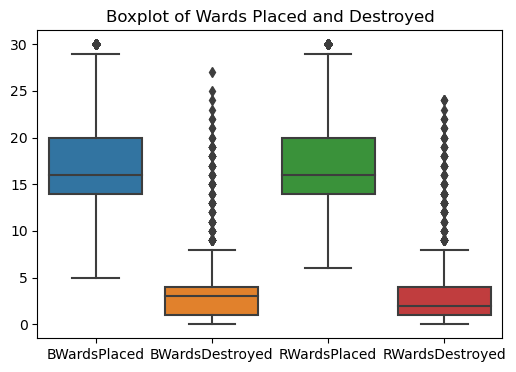

In [52]:
lower_l = 0
upper_l = 30
#Use np.clip to reset outlier to upperlimit
for col in Outliers_Col:
    data[col]= np.clip(data[col], lower_l, upper_l)

plt.figure(figsize= (6,4))
ax= sns.boxplot(data= data[Outliers_Col])
ax.set(title= "Boxplot of Wards Placed and Destroyed")
plt.show()

## Exploratory Data Analysis

### Visualizing Data Distributions


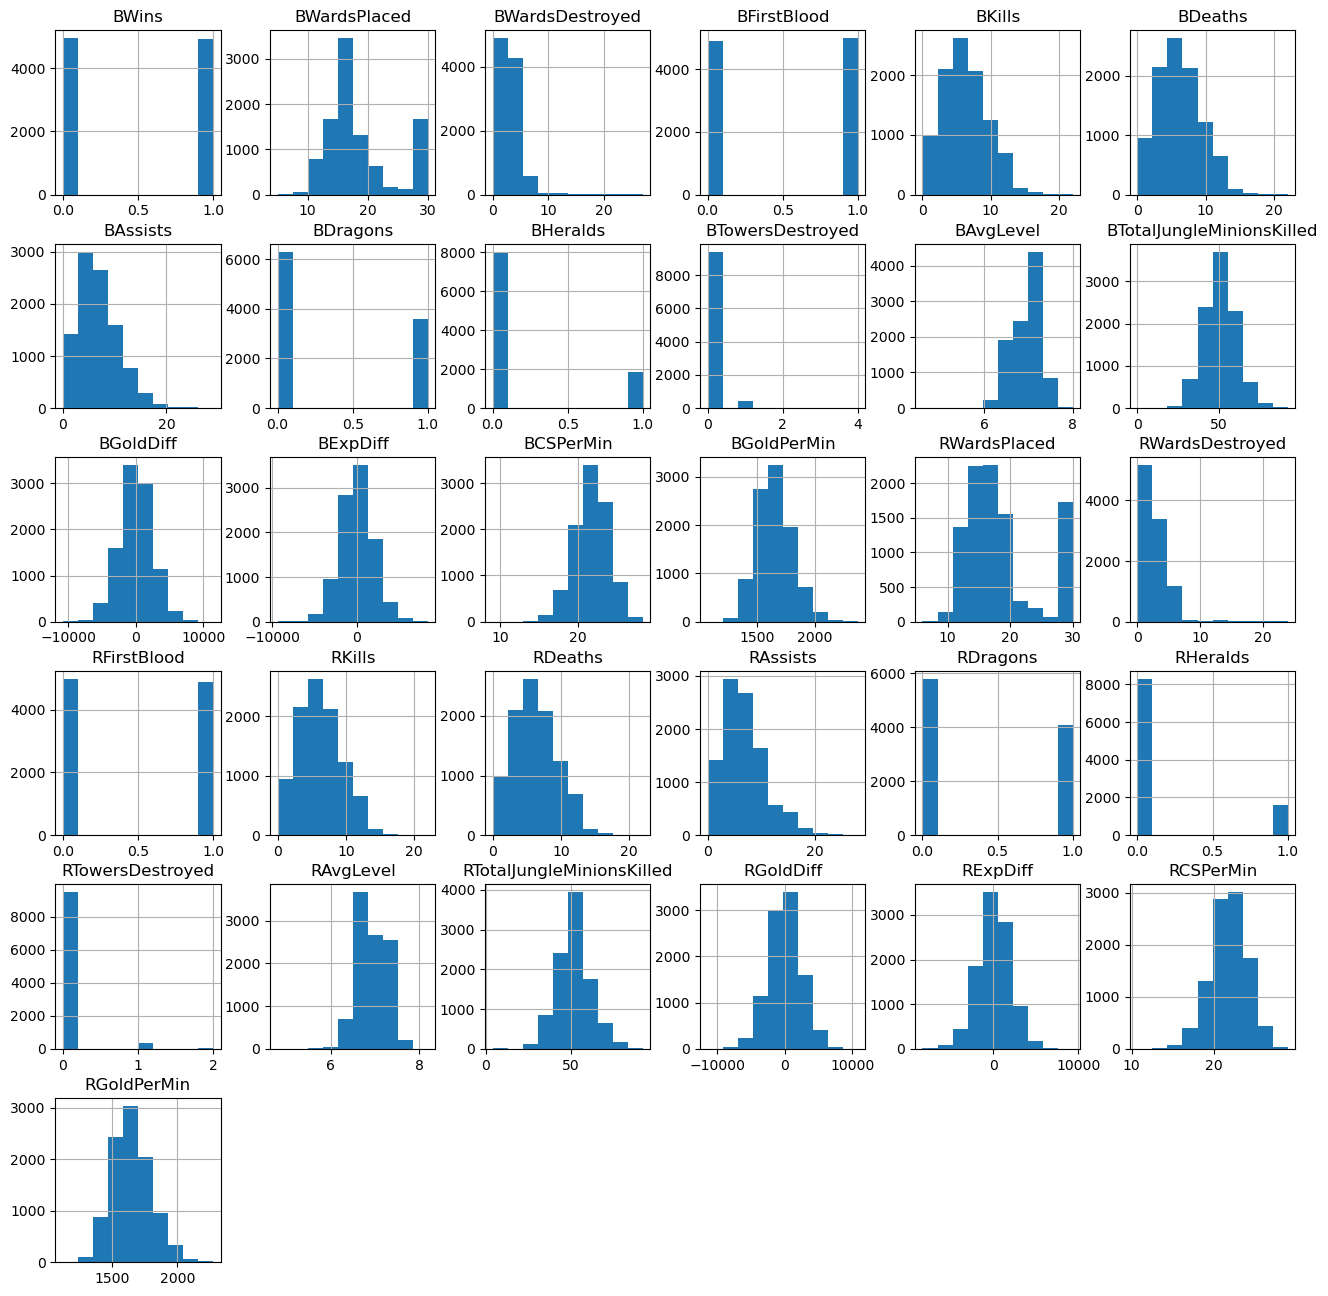

In [53]:
data.hist(figsize= (16,16))
plt.show()

### Correlation Among Various Columns

In [54]:
data.drop("BWins",axis= 1, inplace= False).corr()

,BWardsPlaced,BWardsDestroyed,BFirstBlood,BKills,BDeaths,BAssists,BDragons,BHeralds,BTowersDestroyed,BAvgLevel,...,RAssists,RDragons,RHeralds,RTowersDestroyed,RAvgLevel,RTotalJungleMinionsKilled,RGoldDiff,RExpDiff,RCSPerMin,RGoldPerMin
BWardsPlaced,1.000000,0.080709,0.015953,0.032652,-0.042695,0.066087,0.026716,0.018975,-0.003873,0.060934,...,-0.031501,-0.036875,-0.014977,-0.024194,-0.043241,-0.016562,-0.047861,-0.068422,0.003263,-0.039955
BWardsDestroyed,0.080709,1.000000,0.017717,0.033748,-0.073182,0.067793,0.040504,0.016940,-0.009150,0.060294,...,-0.046212,-0.034439,-0.012712,-0.023943,-0.059090,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
BFirstBlood,0.015953,0.017717,1.000000,0.269425,-0.247929,0.229485,0.134309,0.077509,0.083316,0.177617,...,-0.201140,-0.135327,-0.060246,-0.069584,-0.182602,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
BKills,0.032652,0.033748,0.269425,1.000000,0.004044,0.813667,0.170436,0.076195,0.180314,0.434867,...,-0.020344,-0.207949,-0.104423,-0.082491,-0.412219,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
BDeaths,-0.042695,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.188852,-0.095527,-0.071441,-0.414755,...,0.804023,0.150746,0.076639,0.156780,0.433383,-0.100271,0.640000,0.577613,-0.040521,0.885728
BAssists,0.066087,0.067793,0.229485,0.813667,-0.026372,1.000000,0.170873,0.028434,0.123663,0.292661,...,-0.007481,-0.189563,-0.058074,-0.060880,-0.356928,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
BDragons,0.026716,0.040504,0.134309,0.170436,-0.188852,0.170873,1.000000,0.020381,0.039750,0.160683,...,-0.162406,-0.631930,-0.016827,-0.032865,-0.149806,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871
BHeralds,0.018975,0.016940,0.077509,0.076195,-0.095527,0.028434,0.020381,1.000000,0.217901,0.128201,...,-0.051209,0.022035,-0.210012,-0.042872,-0.087337,-0.019622,-0.162943,-0.162496,-0.046253,-0.109557
BTowersDestroyed,-0.003873,-0.009150,0.083316,0.180314,-0.071441,0.123663,0.039750,0.217901,1.000000,0.124453,...,-0.036254,-0.028482,-0.031973,0.011738,-0.204429,-0.038505,-0.294060,-0.218320,-0.186879,-0.122465
BAvgLevel,0.060934,0.060294,0.177617,0.434867,-0.414755,0.292661,0.160683,0.128201,0.124453,1.000000,...,-0.366039,-0.137854,-0.100798,-0.183090,-0.228466,-0.013128,-0.653538,-0.718822,-0.123316,-0.440031


#### Here we only show the high(>0.5) and low(<-0.5) corr graph.

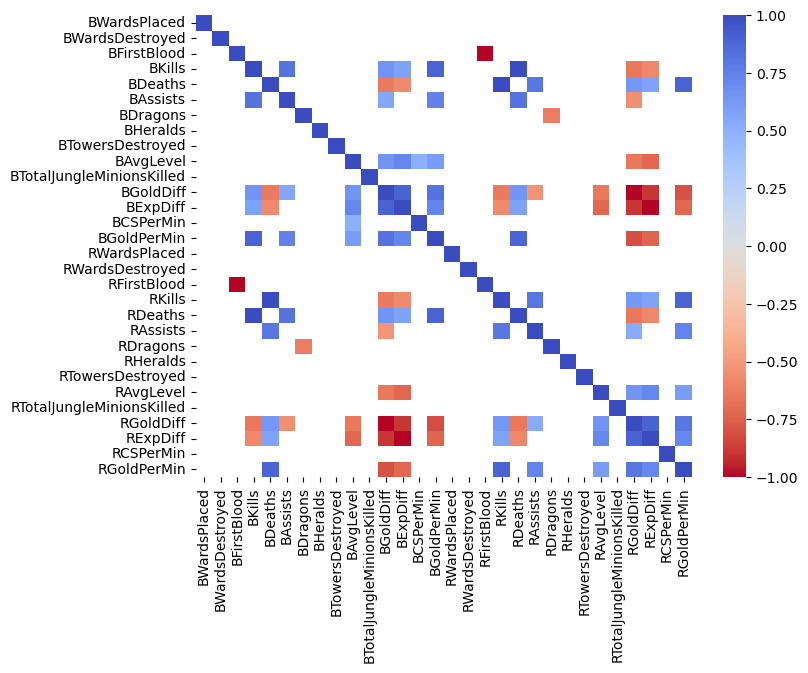

In [55]:
plt.figure(figsize= (8, 6))
corr= data.drop("BWins", axis= 1).corr()
filtered_corr= corr[(corr> 0.5) | (corr< -0.5)]
sns.heatmap(filtered_corr, cmap= "coolwarm_r")
plt.show()

### Win Rate 

In [56]:
#Win Rate of 2 sides
B_wins_count= data["BWins"].sum()
R_wins_count= len(data)- B_wins_count
B_WR= (B_wins_count / len(data)) 
R_WR= 1 - B_WR
print(B_WR,R_WR)

0.4990383642069035 0.5009616357930965


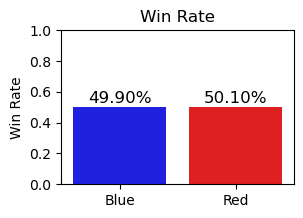

In [57]:
plt.figure(figsize=(3,2))
barplot = sns.barplot(x= ["Blue", "Red"], y=[B_WR, R_WR], palette=["Blue", "Red"])
for index, value in enumerate([B_WR, R_WR]):
    barplot.text(index, value + 0.01, f"{value:.2%}", ha="center", va="bottom", fontsize=12)
plt.title("Win Rate")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.show()

### Win Rate with First Blood

In [58]:
B_FB_Wins= len(data[(data["BFirstBlood"]== 1) & (data["BWins"]== 1)])
B_FB= len(data[data["BFirstBlood"]== 1])
B_WR_FB= B_FB_Wins/ B_FB

R_FB_Wins= len(data[(data["RFirstBlood"]== 1) & (data["BWins"]== 0)])

R_FB= len(data[data["RFirstBlood"]== 1])
R_WR_FB= R_FB_Wins/ R_FB 

print(f"Blue Teams' Win Rate If Secure First Blood: {B_WR_FB:.2%}")
print(f"Red Teams' Win Rate If Secure First Blood: {R_WR_FB:.2%}")


Blue Teams' Win Rate If Secure First Blood: 59.90%
Red Teams' Win Rate If Secure First Blood: 60.28%


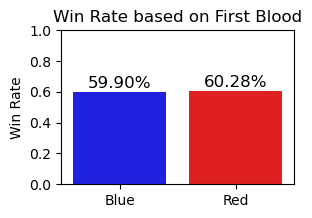

In [59]:
plt.figure(figsize=(3,2))
barplot = sns.barplot(x= ["Blue", "Red"], y=[B_WR_FB, R_WR_FB], palette=["Blue", "Red"])
for index, value in enumerate([B_WR_FB, R_WR_FB]):
    barplot.text(index, value + 0.01, f"{value:.2%}", ha="center", va="bottom", fontsize=12)
plt.title("Win Rate based on First Blood")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.show()

#### If secures the FirstBlood in the first 10 min of the game, the Win Rate is approx.10% higher than the original Win Rate.

### Average Level

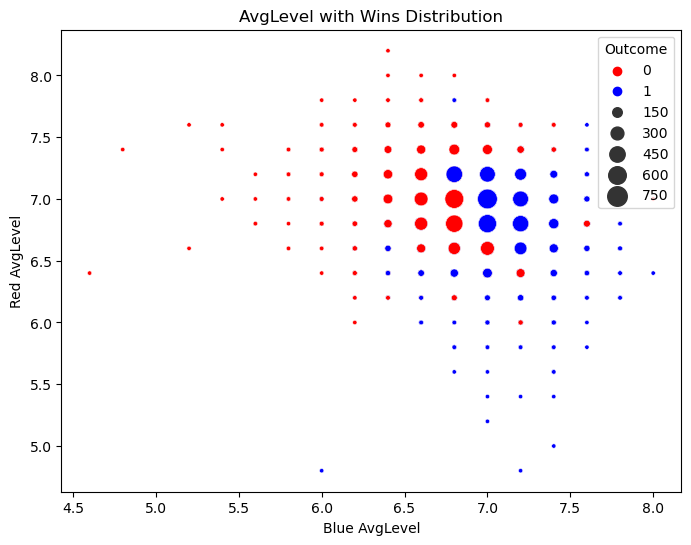

In [63]:
data["BAvgLevel"]= pd.to_numeric(data["BAvgLevel"], errors= "coerce")
data["RAvgLevel"]= pd.to_numeric(data["RAvgLevel"], errors= "coerce")

lol_P ={1:"blue", 0:"red"}

plt.figure(figsize=(8, 6))
ax= sns.scatterplot(data= data, x= "BAvgLevel", y= "RAvgLevel", hue= "BWins", 
                    size= data.groupby(["BAvgLevel", "RAvgLevel"])["BWins"].transform("count"),
                    sizes= (10,200), palette= lol_P)
ax.set(title= "AvgLevel with Wins Distribution",xlabel= "Blue AvgLevel", ylabel= "Red AvgLevel")

plt.legend(title= "Outcome", loc= "upper right")
plt.show()

### Gold Difference

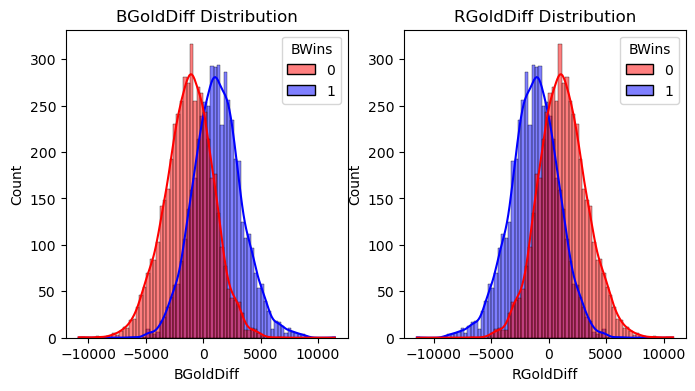

In [65]:
fig, axes= plt.subplots(1,2 , figsize=(8, 4))
sns.histplot(x= data["BGoldDiff"],kde= True, hue= data["BWins"],palette= lol_P, ax= axes[0])
axes[0].set_title("BGoldDiff Distribution")
sns.histplot(x= data["RGoldDiff"],kde= True, hue= data["BWins"],palette= lol_P )
axes[1].set_title("RGoldDiff Distribution")
plt.show()


### Experience 

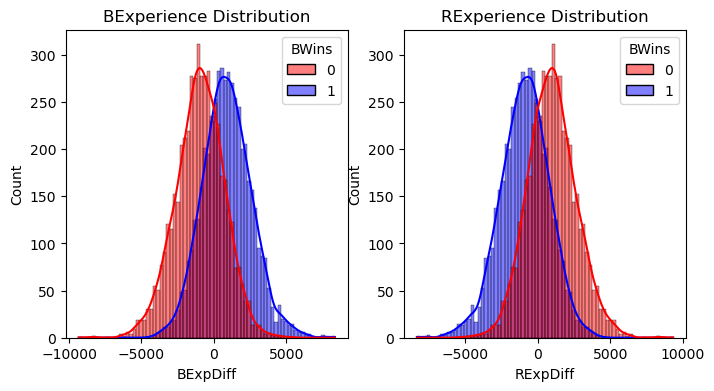

In [66]:
fig, axes= plt.subplots(1,2 , figsize= (8, 4))
sns.histplot(x= data["BExpDiff"],kde= True, hue= data["BWins"],palette= lol_P, ax= axes[0])
axes[0].set_title("BExperience Distribution")
sns.histplot(x= data["RExpDiff"],kde= True, hue= data["BWins"],palette= lol_P, )
axes[1].set_title("RExperience Distribution")
plt.show()


### KDA Analysis - Kills
#### ※Please noted that 1 =Blue wins, 0 = Red  wins.

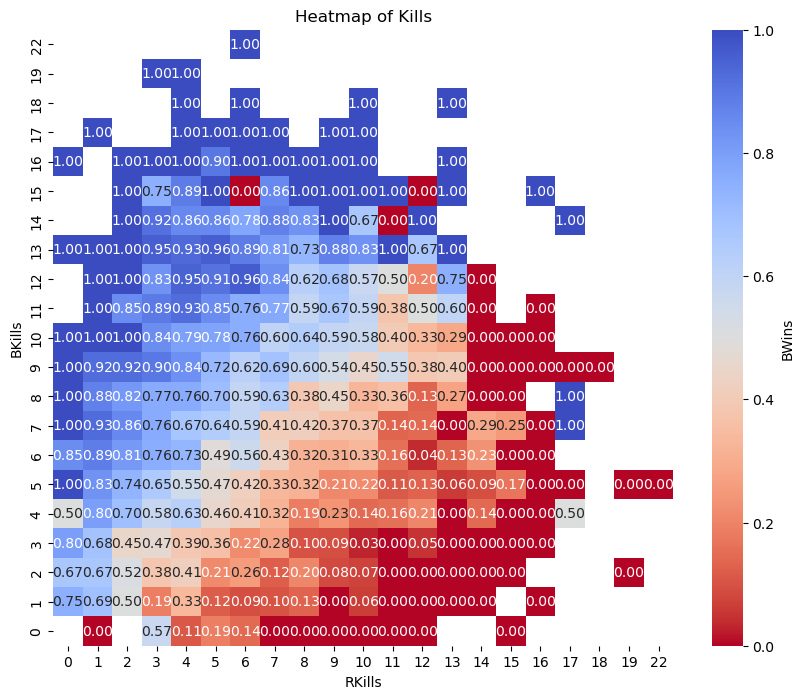

In [67]:
plt.figure(figsize= (10,8))
ax= sns.heatmap(data.pivot_table(index= "BKills", columns= "RKills", values= "BWins")[::-1], cmap= "coolwarm_r", annot= True,
                fmt= ".2f", cbar_kws= {"label": "BWins"})
ax.set(title= "Heatmap of Kills", xlabel= "RKills", ylabel= "BKills")
plt.show()

### KDA Analysis - Deaths

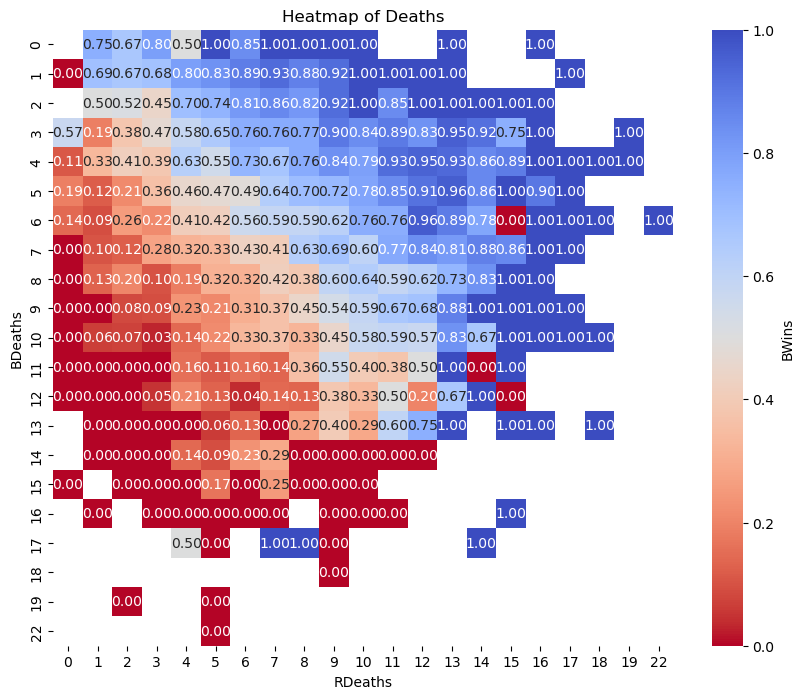

In [68]:
plt.figure(figsize= (10,8))
ax= sns.heatmap(data.pivot_table(index= "BDeaths", columns= "RDeaths", values= "BWins"), cmap= "coolwarm_r", annot= True,
                fmt= ".2f", cbar_kws= {"label": "BWins"})
ax.set(title= "Heatmap of Deaths", xlabel= "RDeaths", ylabel= "BDeaths")
plt.show()

### KDA Analysis - Assists

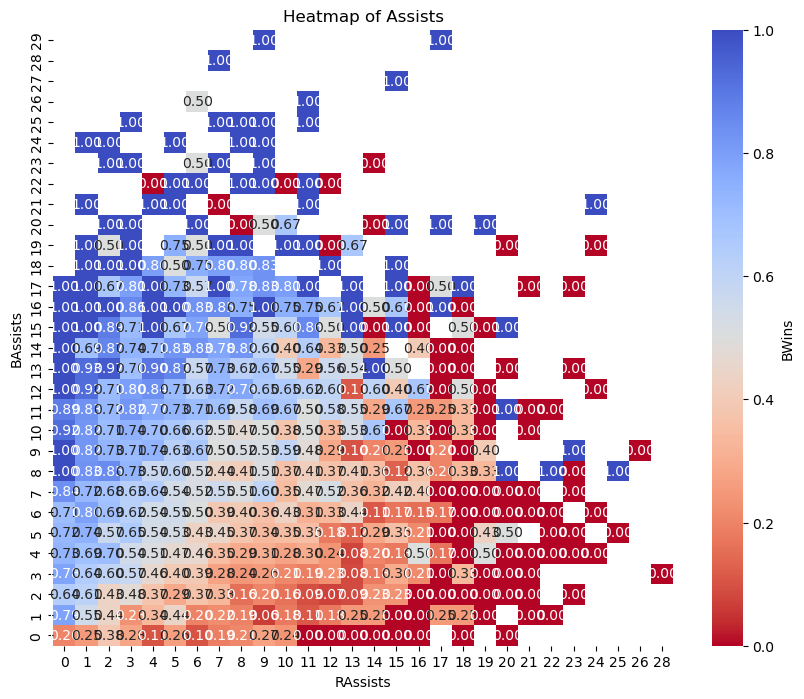

In [69]:
plt.figure(figsize= (10,8))
ax= sns.heatmap(data.pivot_table(index= "BAssists", columns= "RAssists", values= "BWins")[::-1], cmap= "coolwarm_r", annot= True, 
                fmt= ".2f", cbar_kws= {"label": "BWins"})
ax.set(title= "Heatmap of Assists", xlabel= "RAssists", ylabel= "BAssists")
plt.show()

### KDA Analysis 
#### KDA =( Kills + Assists ) / Deaths, its a indicator that usually used to evaluate a player"s performance in many online game.  
##### A high KDA usually means that the player achieved more kills and reduced the number of deaths in the battle, that is more helpful in the game.  

#### We set the upper limit to 30, lower limit to 0 to avoid inf or -inf values when dealing with data that might be zero.

In [70]:
data["BKDA"]= (data["BKills"] + data["BAssists"]) / data["BDeaths"]
data["RKDA"]= (data["RKills"] + data["RAssists"]) / data["RDeaths"]

# To Avoid inf or -inf output. 
data.loc[np.isinf(data["BKDA"]), "BKDA"]= 30
data.loc[np.isinf(data["RKDA"]), "RKDA"]= 30
data.loc[np.isneginf(data["BKDA"]), "BKDA"]= 0
data.loc[np.isneginf(data["RKDA"]), "RKDA"]= 0

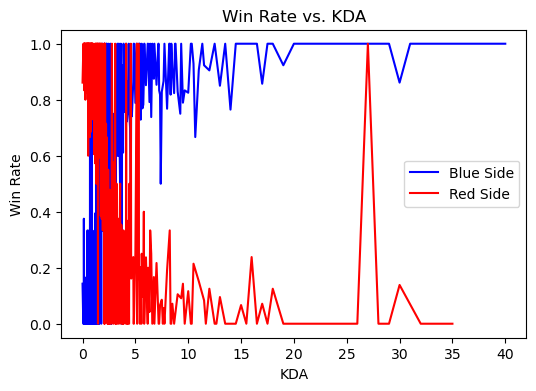

In [73]:
plt.figure(figsize= (6,4))
ax= sns.lineplot(data= data, x= "BKDA", y= "BWins", label= "Blue Side", ci= None, color= "blue")
sns.lineplot(data= data, x= "RKDA", y= "BWins", label= "Red Side", ci= None, color= "red")

ax.set(title= "Win Rate vs. KDA", xlabel= "KDA", ylabel= "Win Rate")
ax.legend()
plt.show()

### Wards Placed 
####  Wards are items placed on the map to enhance visibility in the game. (In the games, much of the map is shrouded in the fog of war, preventing players from seeing the movements of enemies.)  
#### Having ample vision is crucial, enabling teams to identify enemy positions, control key map locations, and anticipate enemy's actions in advance.

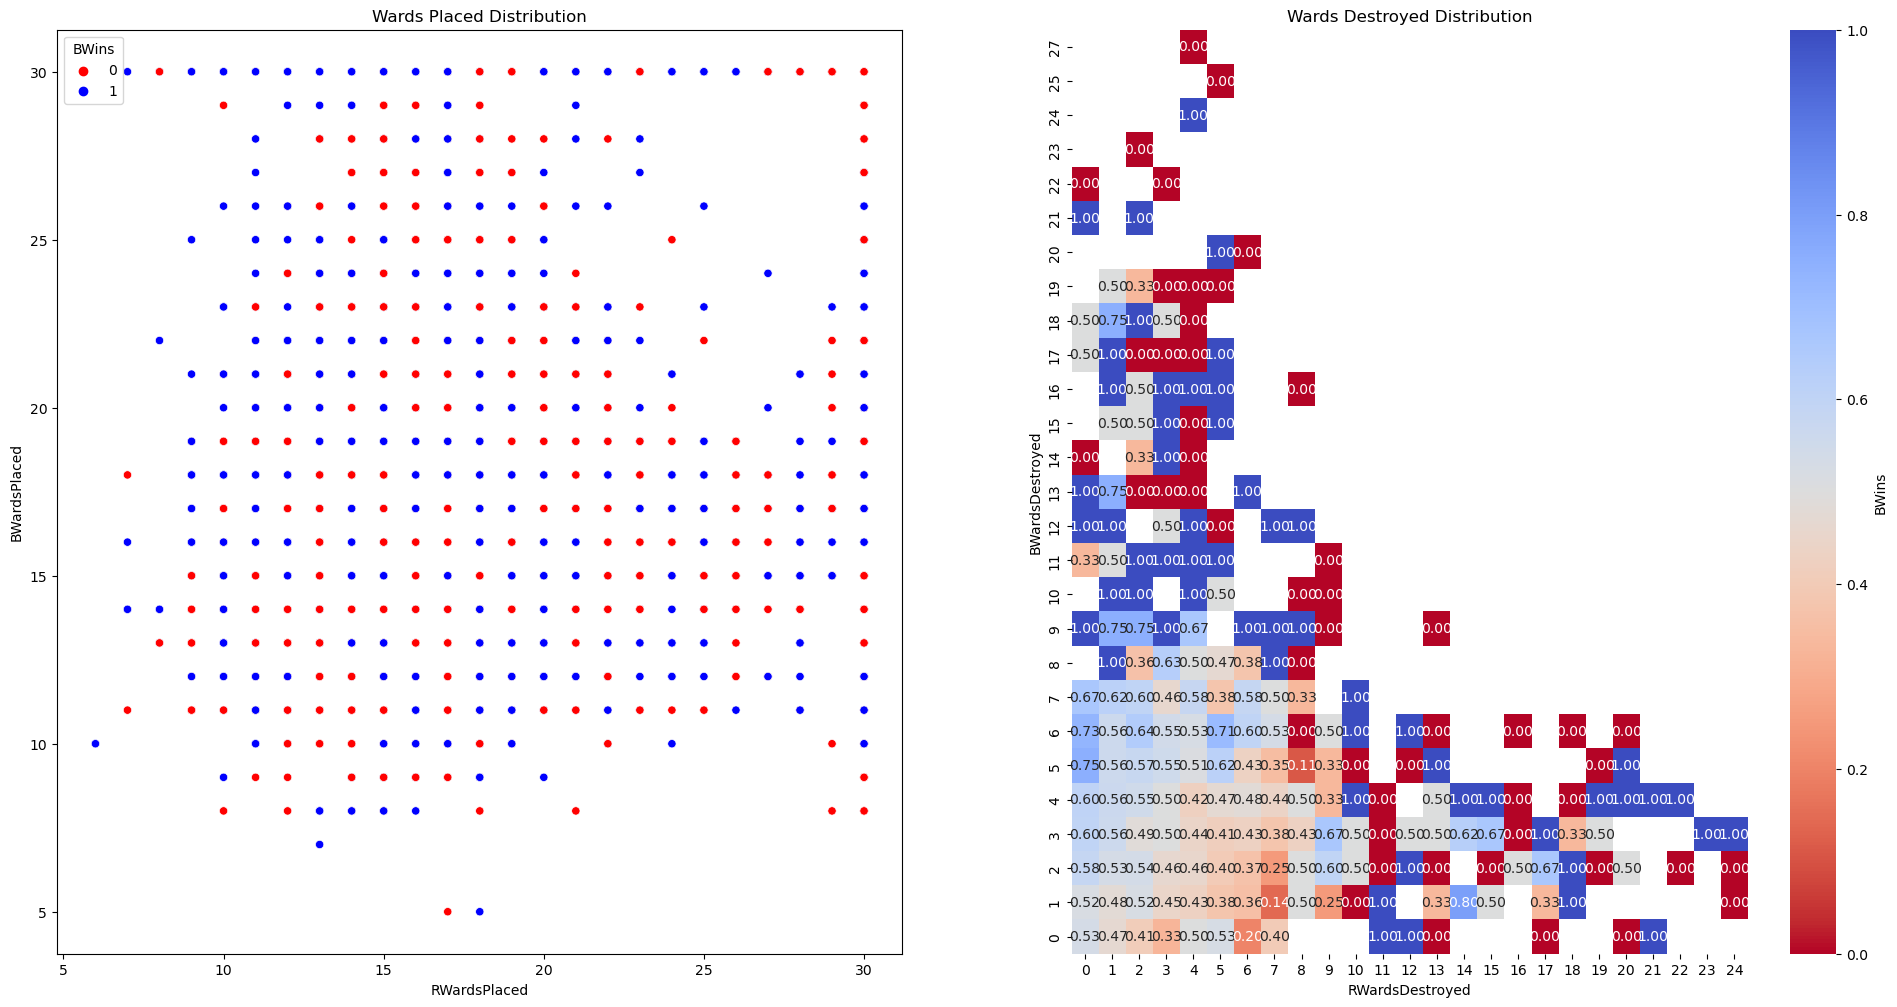

In [74]:
fig, axes= plt.subplots(1,2 , figsize= (24,12))
sns.scatterplot(data= data, x= "RWardsPlaced", y= "BWardsPlaced", hue= "BWins", palette= lol_P, ax= axes[0])
axes[0].set_title("Wards Placed Distribution")
sns.heatmap(data.pivot_table(index= "BWardsDestroyed", columns= "RWardsDestroyed", values= "BWins")[::-1], 
            cmap= "coolwarm_r", annot= True, fmt= ".2f", cbar_kws= {"label": "BWins"})
axes[1].set_title("Wards Destroyed Distribution")

plt.show()

### Gold & Income

#### In LOL, 2 teams' Nexuses periodically spawn minions, providing players with a key source of gold income.  Players can strategically eliminate these minions to get advantage in the game.  
#### 1 player in the team often assumes the role of the "Jungler"(JG). In the early stages, JGs strategically navigate the map's periphery, relying not on minions but on jungle monsters as their main source of gold income.

##### ※Here CS Per Min  = Minions been killed by the team per min

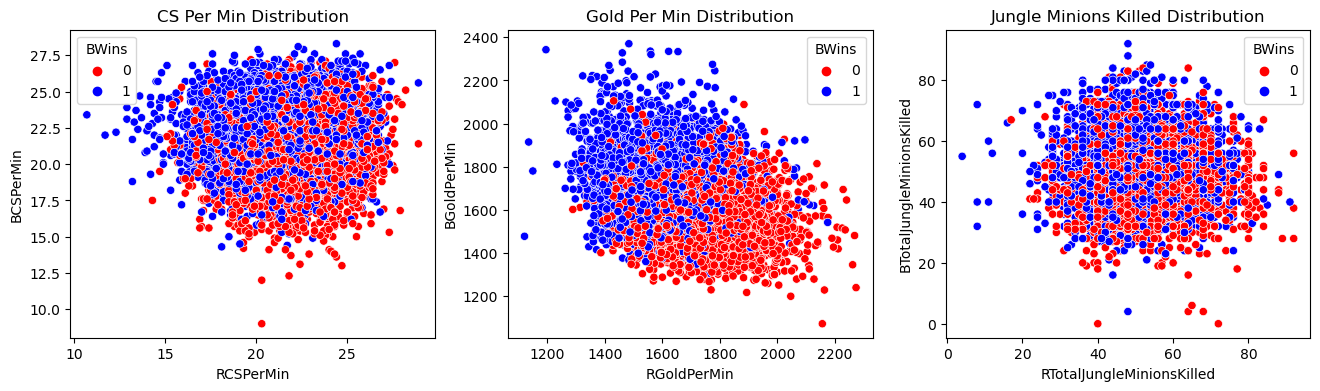

In [75]:
fig, axes= plt.subplots(1, 3 , figsize= (16, 4))
sns.scatterplot(data= data, x= "RCSPerMin", y= "BCSPerMin", hue= "BWins", palette= lol_P, ax= axes[0])
axes[0].set_title("CS Per Min Distribution")

sns.scatterplot(data= data, x= "RGoldPerMin", y= "BGoldPerMin", hue= "BWins", palette= lol_P, ax= axes[1])
axes[1].set_title("Gold Per Min Distribution")

sns.scatterplot( data= data, x= "RTotalJungleMinionsKilled", y= "BTotalJungleMinionsKilled", hue= "BWins", palette= lol_P, ax= axes[2])
axes[2].set_title("Jungle Minions Killed Distribution")

plt.show()

### Other Objectives
#### In LOL, the map features elite monsters known as "Dragon" and "Herald". Killing them provides huge buffs or benefits, significantly enhancing advantages or turning the tide in a team's favor. Both sides frequently engage in contested battles to secure these valuable objectives.  

##### Dragons spawn every 5 mins, starting from the 5th min of the game, and respawn every 5 mins after being killed. 
##### Heralds appear at the 8th min and similarly respawn every 5 mins.   
#### Consequently, within the first 10 mins of a match, only 1 Dragon and 1 Herald can be slain.

In [76]:
Object_Scenario= [(b_dragon, b_herald, r_dragon, r_herald)
              for b_dragon in [0, 1]
              for b_herald in [0, 1]
              for r_dragon in [0, 1]
              for r_herald in [0, 1]]
Object_WR= []
for s in Object_Scenario:
    b_dragon, b_herald, r_dragon, r_herald= s
    condition= (data["BDragons"]== b_dragon) & (data["BHeralds"]== b_herald) & (data["RDragons"]== r_dragon) & (data["RHeralds"]== r_herald)
    o_wr= data[condition]["BWins"].mean()
    Object_WR.append(o_wr)


Object_df= pd.DataFrame(Object_WR, index= pd.MultiIndex.from_tuples(Object_Scenario, names= ["BDragons", "BHeralds", "RDragons", "RHeralds"]), columns= ["Win Rate"])
Object_df= Object_df.sort_index(level= ["BDragons", "BHeralds", "RDragons", "RHeralds"])
print(Object_df)



                                     Win Rate
BDragons BHeralds RDragons RHeralds          
0        0        0        0         0.504442
                           1         0.366883
                  1        0         0.369001
                           1         0.286301
         1        0        0         0.600592
                           1              NaN
                  1        0         0.469716
                           1              NaN
1        0        0        0         0.636677
                           1         0.535912
                  1        0              NaN
                           1              NaN
         1        0        0         0.735211
                           1              NaN
                  1        0              NaN
                           1              NaN


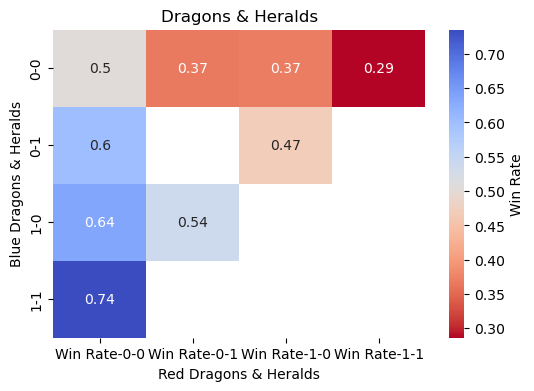

In [78]:
plt.figure(figsize= (6,4))
ax= sns.heatmap(Object_df.unstack(level= ["RDragons", "RHeralds"]), annot= True, cmap= "coolwarm_r", cbar_kws= {"label": "Win Rate"})
ax.set(title= "Dragons & Heralds", xlabel= "Red Dragons & Heralds", ylabel= "Blue Dragons & Heralds")
plt.show()

### Dominant Factors in the First 10  Minutes and Their Impact on Game Outcome

In [79]:
BR_WR = pd.DataFrame({"Blue's WR": B_WR_FB, "Red's WR": R_WR_FB}, index=["FirstBlood"])
print(BR_WR)

            Blue's WR  Red's WR
FirstBlood   0.598957  0.602821


In [80]:
KDA_Columns= ["Kills", "Deaths", "Assists", "KDA"]

for col in KDA_Columns:
    B_adv_col= f"B{col}"
    R_adv_col= f"R{col}"
    B_WR_Adv= data[data[B_adv_col] > data[R_adv_col]]["BWins"].mean()
    R_WR_Adv= 1 - data[data[R_adv_col] > data[B_adv_col]]["BWins"].mean()
    BR_WR.loc[col, "Blue's WR"]= B_WR_Adv
    BR_WR.loc[col, "Red's WR"]= R_WR_Adv

print(BR_WR)

            Blue's WR  Red's WR
FirstBlood   0.598957  0.602821
Kills        0.724107  0.728665
Deaths       0.271335  0.275893
Assists      0.675652  0.677349
KDA          0.700919  0.705226


In [81]:
KDA_Columns= ["WardsPlaced", "AvgLevel","CSPerMin", "GoldPerMin"]

for col in KDA_Columns:
    B_adv_col= f"B{col}"
    R_adv_col= f"R{col}"
    B_WR_Adv= data[data[B_adv_col] > data[R_adv_col]]["BWins"].mean()
    R_WR_Adv= 1 - data[data[R_adv_col] > data[B_adv_col]]["BWins"].mean()
    BR_WR.loc[col, "Blue's WR"]= B_WR_Adv
    BR_WR.loc[col, "Red's WR"]= R_WR_Adv

print(BR_WR)

             Blue's WR  Red's WR
FirstBlood    0.598957  0.602821
Kills         0.724107  0.728665
Deaths        0.271335  0.275893
Assists       0.675652  0.677349
KDA           0.700919  0.705226
WardsPlaced   0.531076  0.533454
AvgLevel      0.731775  0.726245
CSPerMin      0.629684  0.626584
GoldPerMin    0.720968  0.724832


In [82]:
Object_Columns= ["Dragons", "Heralds", "TowersDestroyed"]

for col in Object_Columns:
    B_Adv_Col= f"B{col}"
    R_Adv_Col= f"R{col}"
    
    B_WR_Adv= data[data[B_Adv_Col] > data[R_Adv_Col]]["BWins"].mean()
    R_WR_Adv= 1 - data[data[R_Adv_Col] > data[B_Adv_Col]]["BWins"].mean()

    BR_WR.loc[col, "Blue's WR"]= B_WR_Adv
    BR_WR.loc[col, "Red's WR"]= R_WR_Adv

print(BR_WR)
BR_corr= BR_WR["Blue's WR"].corr(BR_WR["Red's WR"])
print(f"Correlation : {BR_corr}")

                 Blue's WR  Red's WR
FirstBlood        0.598957  0.602821
Kills             0.724107  0.728665
Deaths            0.271335  0.275893
Assists           0.675652  0.677349
KDA               0.700919  0.705226
WardsPlaced       0.531076  0.533454
AvgLevel          0.731775  0.726245
CSPerMin          0.629684  0.626584
GoldPerMin        0.720968  0.724832
Dragons           0.640940  0.625827
Heralds           0.595046  0.612271
TowersDestroyed   0.759637  0.786096
Correlation : 0.9969642648617048


In [83]:
B_Top5,R_Top5= BR_WR["Blue's WR"].nlargest(5).index, BR_WR["Red's WR"].nlargest(5).index
are_equal= set(B_Top5)== set(R_Top5)

print(f"Blue's WR Highest 5 Factors:: {B_Top5}")
print(f"Red's WR Highest 5 Factors: {R_Top5}")
print(f"Same or not: {are_equal}")


Blue's WR Highest 5 Factors:: Index(['TowersDestroyed', 'AvgLevel', 'Kills', 'GoldPerMin', 'KDA'], dtype='object')
Red's WR Highest 5 Factors: Index(['TowersDestroyed', 'Kills', 'AvgLevel', 'GoldPerMin', 'KDA'], dtype='object')
Same or not: True


#### Once your team gets an advantage at TowersDestroyed in the first 10 min, you"re very likely to win the game!(75%+ WR)

### Does Being on Red side or Blue side Have a Significant Impact on  Win Rate?

In [84]:
#T Test
T_stat, P_value= ttest_ind(BR_WR["Blue's WR"],BR_WR["Red's WR"])
#If P-Value < 0.05 
alpha= 0.05
print("p_value:", P_value)
if P_value< alpha:
    print("2 sets of Win Rate data exhibit significant diff.(Reject Null Hypothesis)")
else:
    print("There's no significant diff between 2 teams's Win Rate Data.(Null hypothesis cannot be rejected)")



p_value: 0.9452662043772597
There's no significant diff between 2 teams's Win Rate Data.(Null hypothesis cannot be rejected)


## Feature Engineering


### Feature Creation
#### We selected some features to avoid multicollinearity, all analyzed in relation to whether Blue team wins / loses.  In the following analysis, we adopt the perspective of the Blue team as the primary viewpoint.  

  
##### Wins: Binary value,1 = Blue team wins, 0 = Red team Wins.  
##### FirstBlood: Binary value, 1 = Blue team secures the first kill in the game, and 0 = Red team gets the first kill.
##### GoldDiff: Blue teams' gold - Red teams' gold. (In the 10th min)
##### KDADiff: Blue teams' KDA - Red teams' KDA. (In the 10th min)
##### And so forth.  

In [85]:
df= pd.DataFrame()
df["Wins"]= data["BWins"]
df["FirstBlood"]= data["BFirstBlood"]
df["GoldDiff"]= data["BGoldDiff"]
features= ["KDA", "WardsPlaced", "WardsDestroyed", "TowersDestroyed", 
            "AvgLevel", "CSPerMin", "Dragons", "Heralds"]
for feature in features:
    df[feature + "Diff"]= data["B" + feature]- data["R" + feature]


df.head()

,Wins,FirstBlood,GoldDiff,KDADiff,WardsPlacedDiff,WardsDestroyedDiff,TowersDestroyedDiff,AvgLevelDiff,CSPerMinDiff,DragonsDiff,HeraldsDiff
0,0,1,643,1.777778,13,-4,0,-0.2,-0.2,0,0
1,0,0,-2908,0.600000,0,0,-1,-0.2,-6.6,-1,-1
2,0,0,-1172,-2.571429,0,-3,0,-0.4,-1.7,1,0
3,0,0,-1321,-1.950000,15,-1,0,0.0,-3.4,0,1
4,0,0,-1004,-0.166667,13,2,0,0.0,-1.5,-1,0


### Check The Data Distribution of Features

In [86]:
df.describe()

,Wins,FirstBlood,GoldDiff,KDADiff,WardsPlacedDiff,WardsDestroyedDiff,TowersDestroyedDiff,AvgLevelDiff,CSPerMinDiff,DragonsDiff,HeraldsDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.504808,14.414111,0.009623,-0.020144,0.101731,0.008402,-0.009313,-0.064966,-0.051119,0.027938
std,0.500024,0.500002,2453.349179,6.049175,8.453528,2.854910,0.324835,0.478434,3.094267,0.878945,0.589292
min,0.000000,0.000000,-10830.000000,-34.857143,-22.000000,-23.000000,-2.000000,-2.600000,-12.000000,-1.000000,-1.000000
25%,0.000000,0.000000,-1585.500000,-2.200000,-4.000000,-1.000000,0.000000,-0.400000,-2.100000,-1.000000,0.000000
50%,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000
75%,1.000000,1.000000,1596.000000,2.171429,4.000000,1.000000,0.000000,0.200000,2.000000,1.000000,0.000000
max,1.000000,1.000000,11467.000000,39.823529,23.000000,23.000000,4.000000,2.400000,12.700000,1.000000,1.000000


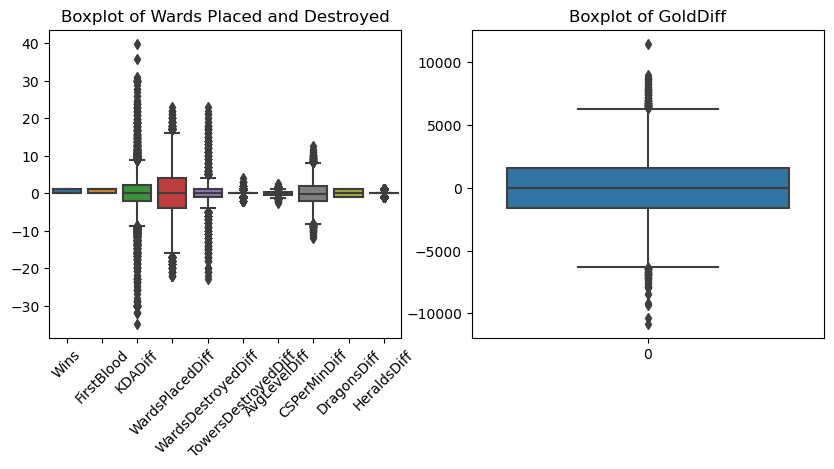

In [87]:
fig, axes= plt.subplots(1, 2, figsize= (10, 4))

sns.boxplot(data= df[df.columns[df.columns!= "GoldDiff"]], ax= axes[0])
axes[0].set(title= "Boxplot of Wards Placed and Destroyed")
axes[0].set_xticklabels(df.columns[df.columns!= "GoldDiff"], rotation= 45)

sns.boxplot(data= df["GoldDiff"], ax= axes[1])
axes[1].set(title= "Boxplot of GoldDiff")

plt.show()

#### There"s no non-logical outliers.

## Model Building

### Scaling Data

In [88]:
X= df.drop(["Wins"], axis= 1).values
Y= df["Wins"].values
scaler= MinMaxScaler().fit(X)
X= scaler.transform(X) 

### Splitting Data
#### Splitting Data into Trainging and Teststing Sets.

In [89]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= .2, random_state= 11)
for n, d in [("X_train", X_train), ("X_test", X_test), ("Y_train", Y_train), ("Y_test", Y_test)]:
    print(f"{n} Shape= {d.shape}")

X_train Shape= (7903, 10)
X_test Shape= (1976, 10)
Y_train Shape= (7903,)
Y_test Shape= (1976,)


### Model Training and Prediction
#### ．Logistic Regression (LR)  
#### ．Decision Tree (Tree)
#### ．Random Forest (RF)                 
#### ．Support Vector Machine (SVC)  
#### We test these models and evaluate the predictive performance of each model.  

In [90]:
Models= {
    "LR": LogisticRegression(),
    "Tree": tree.DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVC": SVC()}

In [91]:
# LRModel= Models["LR"].fit(X_train, Y_train)
# LRPred= LRModel.predict(X_test)
# TreeModel= Models["Tree"].fit(X_train, Y_train)
# TreePred= TreeModel.predict(X_test)
# RFModel= Models["RF"].fit(X_train, Y_train)
# RFPred= RFModel.predict(X_test)
# SVCModel= Models["SVC"].fit(X_train, Y_train)
# SVCPred= SVCModel.predict(X_test)
prediction = {}
for model_name, model in Models.items():
    fitted_model= model.fit(X_train, Y_train)
    prediction[model_name]= fitted_model.predict(X_test)
    print(f"{model_name}: { round(model.score(X_test, Y_test),4)*100} %")
    print(classification_report(prediction[model_name],Y_test))

LR: 72.82 %
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       987
           1       0.72      0.76      0.74       989

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

Tree: 64.47 %
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       980
           1       0.64      0.67      0.66       996

    accuracy                           0.64      1976
   macro avg       0.64      0.64      0.64      1976
weighted avg       0.64      0.64      0.64      1976

RF: 72.11999999999999 %
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       993
           1       0.71      0.75      0.73       983

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72 

#### Let's check the Confusion Matrix of these outputs.

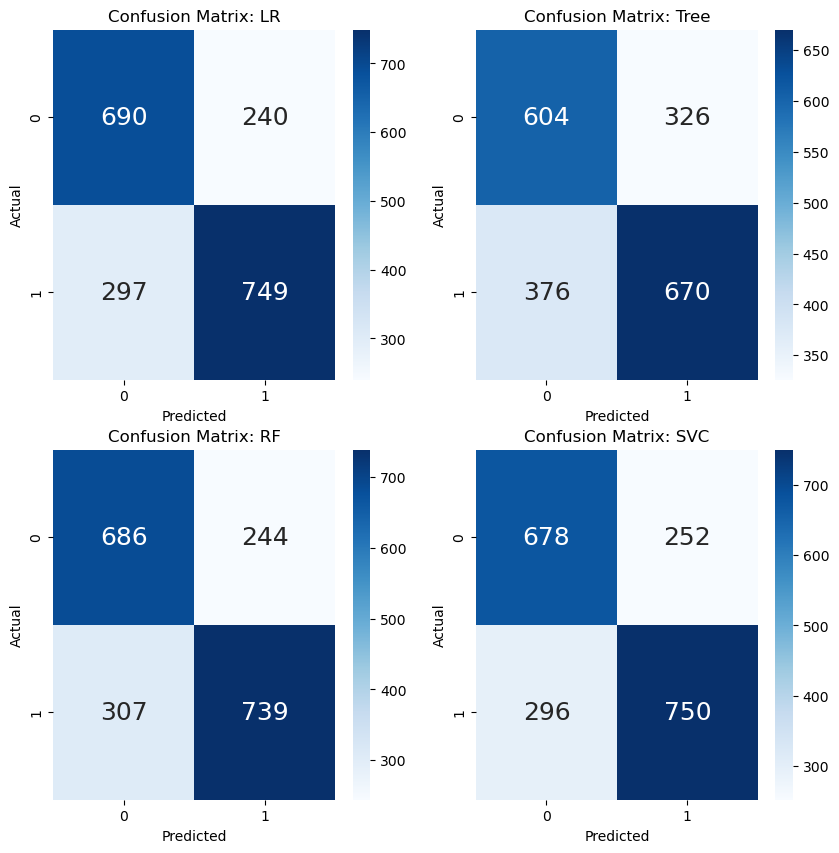

In [92]:
fig, axes= plt.subplots(2, 2, figsize= (10, 10))
for (model_name, predicted_labels), ax in zip(prediction.items(), axes.flatten()):
    cm= confusion_matrix(Y_test, predicted_labels)
    sns.heatmap(cm, annot= True, annot_kws= {"size": 18}, fmt= "d", cmap= "Blues", ax= ax)
    ax.set(title= f"Confusion Matrix: {model_name}", xlabel="Predicted", ylabel="Actual")
plt.show()

#### From the Classification Report and Confusion Matrix, we can observe that the performance of the Decision Tree model is noticeably inferior to the other three.
#### These models have an accuracy rate of 70% or above in their predictions, except for the decision tree.

### Cross Validation
#### We utilize cross validation to assess models' performance and generalization capabilities.   
#### Let's try Logistic Regression model at first.

In [93]:
Cv= 10
Model_LR= Models["LR"]
Score_LR= cross_validate(Model_LR, X_train, Y_train, cv= Cv, scoring= "accuracy")["test_score"]
AvgAcc_LR= np.mean(Score_LR)
SD_LR= np.std(Score_LR)
print(f"Logistic Regression Cross-val Score = {AvgAcc_LR}, ", f"Standard Deviation = {SD_LR}")

Logistic Regression Cross-val Score = 0.7317460673078461,  Standard Deviation = 0.012430282700489926


#### Let"s try other models

In [94]:
Model_df= pd.DataFrame(columns= ["Model", "Cross-val Score", "Standard Deviation"])
for model_name, model in Models.items():
    Scores= cross_validate(model, X_train, Y_train, cv= Cv, scoring="accuracy")["test_score"]
    Avg_acc= np.mean(Scores)
    Std_acc= np.std(Scores)
    
    Model_df= Model_df.append({"Model": model_name, "Cross-val Score": Avg_acc, "Standard Deviation": Std_acc}, ignore_index= True)

print(Model_df)

  Model  Cross-val Score  Standard Deviation
0    LR         0.731746            0.012430
1  Tree         0.640528            0.026605
2    RF         0.718084            0.014840
3   SVC         0.724533            0.014008


 ### ROC Visualization
#### ROC (Receiver Operating Characteristic) curve is a representation of a binary classification model's performance across different classification thresholds.   

#### AUC (Area Under the Curve) provides a single scalar value summarizing the performance of a classifier across various threshold settings, ranging from 0 to 1.(A higher value indicates better model performance)  
##### ※An 0.5 AUC suggests that the model performs no better than random, and an 1.0 AUC indicates perfect classification.

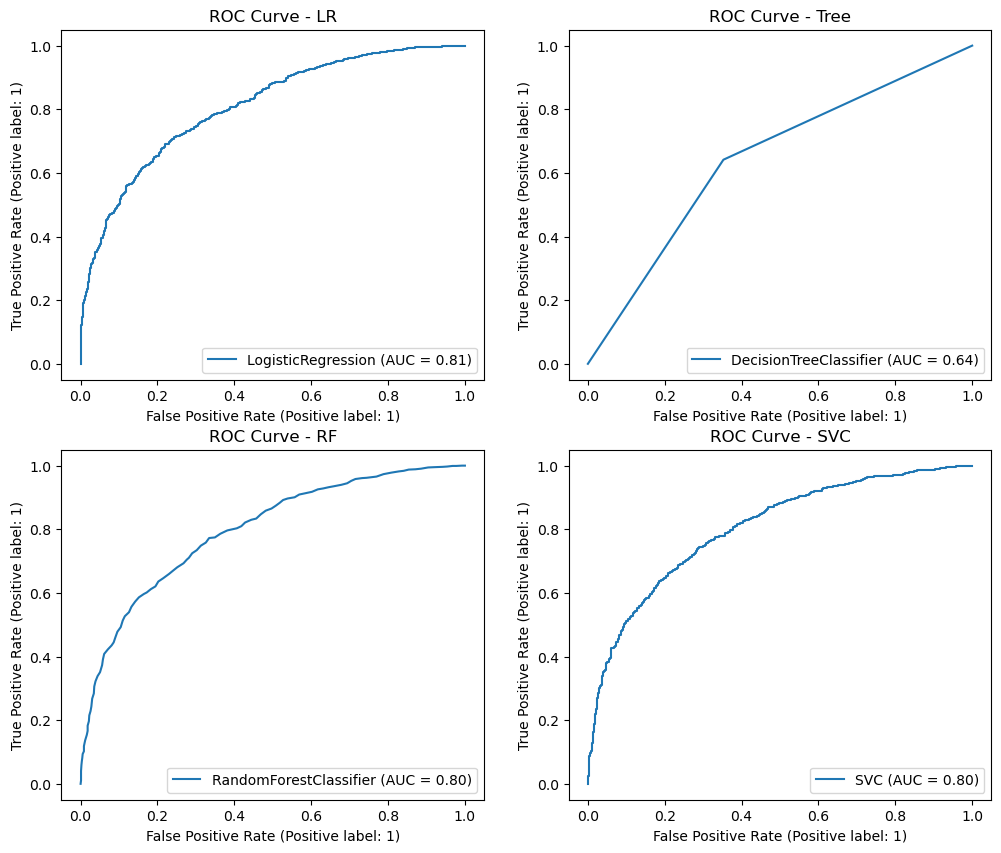

In [95]:
fig, axes= plt.subplots(2, 2, figsize= (12, 10))

for (model_name, model), ax in zip(Models.items(), axes.flatten()):
    fitted_model= model.fit(X_train, Y_train)
    plot_roc_curve(model, X_test, Y_test, ax= ax)
    ax.set_title(f"ROC Curve - {model_name}")

plt.show()

### Weights Visualization

#### Visualizing  coefficients or feature importance of the model provides insights into which features contribute the most to the model's predictions.

Unsupported model: SVC


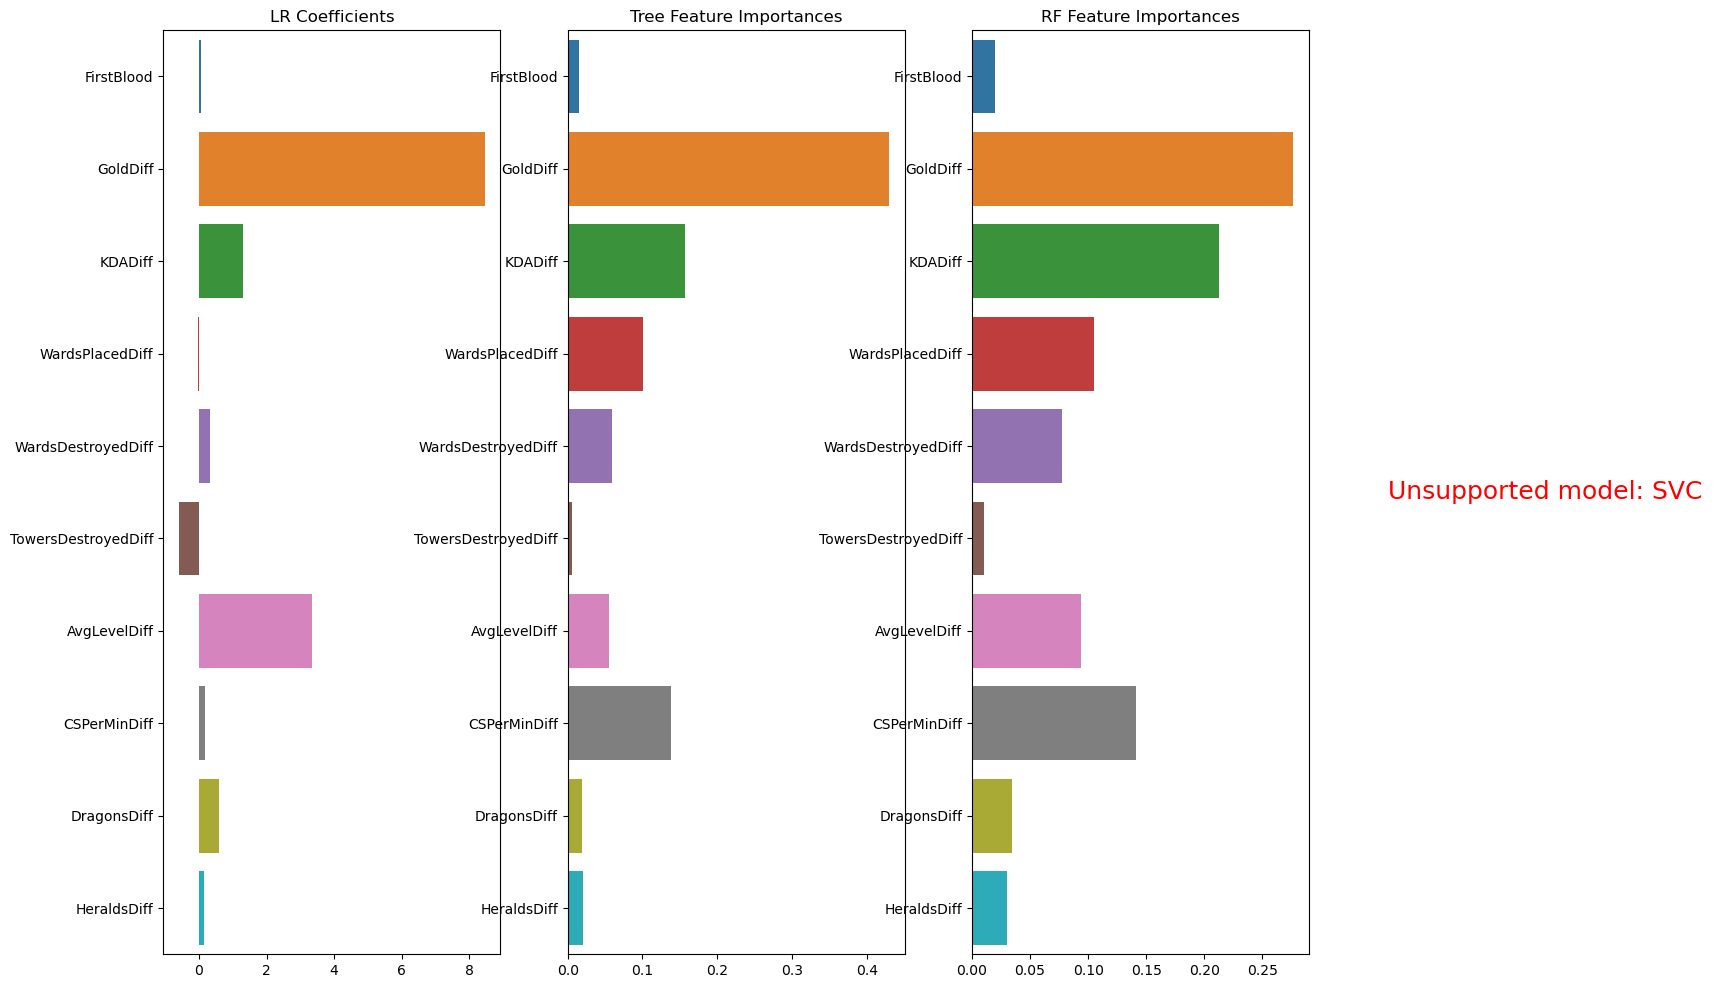

In [96]:
fig, axes= plt.subplots(1, len(Models), figsize= (20, 12))

for idx, (model_name, model) in enumerate(Models.items()):
    model.fit(X_train, Y_train)
    if hasattr(model, "coef_"):
        sns.barplot(x= model.coef_[0], y= df.columns[1:], ax= axes[idx])
        axes[idx].set_title(f"{model_name} Coefficients")
    elif hasattr(model, "feature_importances_"):
        sns.barplot(x= model.feature_importances_, y= df.columns[1:], ax= axes[idx])
        axes[idx].set_title(f"{model_name} Feature Importances")
    else:
        axes[idx].text(0.5, 0.5, f"Unsupported model: {model_name}", ha= "center", va= "center", fontsize= 18, color= "red")
        axes[idx].axis("off")  
        print(f"Unsupported model: {model_name}")


plt.show()

## Conclusion

### From EDA , 
#### we have obtained valuable information, such as:
#### Within the first 10 mins
#### 1. The win rate for the team that secures firstblood has increased by approx. 10% compared to the original win rate.
#### 2. The distribution of average levels for both sides falls between 6.5 and 7.5. If the average level exceeds 7.5, it can be considered a huge advantage.
#### 3. The distribution of gold and level data is very similar.
#### 4. The explanatory power of jungle monster kills is weaker than that of minion kills.
#### 5. Teams that kills 1Dragon + 1Herald have an increased win rate of approx. 20% compared to the original win rate.
#### 6. KDA is an informative indicator for game outcomes.
#### 7.Considering the analyzed factors, there is no significant difference in win rates between Blue or Red sides.

### From the Weights Visualization,
#### it can be observed that GoldDiff is the most crucial factor in determining the game outcome. However, in LOL, many movements contribute to the acquisition of Gold, such as eliminating enemy players, destroying enemy towers, killing minions, jungle minions, and etc. all fundamentally aimed at obtaining Gold (and Experience).   
#### Besides, we can also observe that WardsPlaced and WardsDestroyed carry significant weight (Noted that destroying wards provides only a minimal amount of gold, which can be disregarded), indicating that vision control is also one of the important factors in predicting the outcome of the game.

#### Based on the issues mentioned above, there may have some collinearity problems in this prediction. But due to limitations in the data provided by the dataset, achieving flawless feature engineering is a challenging task. I believe there is room for further improvement."